In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets(
    '../TensorFlow-Bootcamp/03-Convolutional-Neural-Networks/MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../TensorFlow-Bootcamp/03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../TensorFlow-Bootcamp/03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../TensorFlow-Bootcamp/03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../TensorFlow-Bootcamp/03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
num_inputs = 784
hidden1 = 392
hidden2 = 196
hidden3 = hidden1
num_outputs = num_inputs

In [5]:
learning_rate = 0.01
actf = tf.nn.relu

In [6]:
x = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [7]:
initializer = tf.variance_scaling_initializer()

In [8]:
w1 = tf.Variable(initializer([num_inputs, hidden1]), dtype=tf.float32)
w2 = tf.Variable(initializer([hidden1, hidden2]), dtype=tf.float32)
w3 = tf.Variable(initializer([hidden2, hidden3]), dtype=tf.float32)
w4 = tf.Variable(initializer([hidden3, num_outputs]), dtype=tf.float32)

In [9]:
b1 = tf.Variable(tf.zeros(hidden1))
b2 = tf.Variable(tf.zeros(hidden2))
b3 = tf.Variable(tf.zeros(hidden3))
b4 = tf.Variable(tf.zeros(num_outputs))

In [10]:
layer1 = actf(tf.matmul(x, w1) + b1)
layer2 = actf(tf.matmul(layer1, w2) + b2)
layer3 = actf(tf.matmul(layer2, w3) + b3)
output = actf(tf.matmul(layer3, w4) + b4)

In [11]:
loss = tf.reduce_mean(tf.square(output - x))

In [13]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [14]:
init = tf.global_variables_initializer()

In [15]:
saver = tf.train.Saver()

In [17]:
num_epochs = 5
batch_size = 150

with tf.Session() as s:
    s.run(init)
    
    for epoch in range(num_epochs):
        num_batches = mnist.train.num_examples // batch_size
        
        for iteration in range(num_batches):
            x_batch, y_batch = mnist.train.next_batch(batch_size)
            s.run(train, feed_dict={x: x_batch})
        
        training_loss = loss.eval(feed_dict={x: x_batch})
        print("Epoch: {} \t Loss: {}".format(epoch, training_loss))
    
    saver.save(s, './stacked_autoencoder1.ckpt')

Epoch: 0 	 Loss: 0.026679685339331627
Epoch: 1 	 Loss: 0.025396382436156273
Epoch: 2 	 Loss: 0.021246960386633873
Epoch: 3 	 Loss: 0.021682260558009148
Epoch: 4 	 Loss: 0.021222757175564766


In [18]:
num_test_images = 10

with tf.Session() as s:
    saver.restore(s, './stacked_autoencoder1.ckpt')
    
    res = output.eval(feed_dict={x:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from ./stacked_autoencoder1.ckpt


In [19]:
res

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

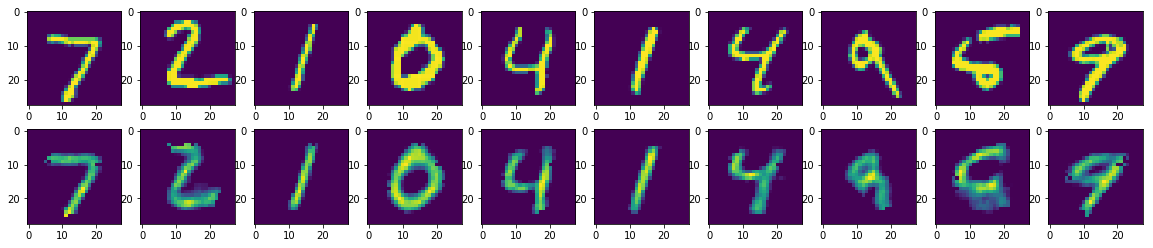

In [21]:
f, a = plt.subplots(2, 10, figsize=(20, 4))

for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(res[i], (28, 28)))